# Computing crops damage adjustment

In [1]:
from data_classes import Mask

zones = ["Tropical", "Hot arid", "Temperate", "Warm", "Cold arid", "Polar", "Snow", "Winter snow"]

Mask.set_aggregation(
    mask_file="mask_clean.nc",
    zones=zones,
    countryregions=None)

## Load yield in a class

The folders to the crop yields must be given as in Alfresco (e.g. LPJmL/Rcp26 - CO2/Sugar cane/lpjml_hadgem2-es_ewembi_rcp26_2005soc_co2_yield-sug-firr_global_annual_2006_2099.nc4)

The temperature must be given in temperature_folder followed by Rcp folder (e.g. Temperature/Rcp26/tas_day_HadGEM2-ES_rcp26_r1i1p1_EWEMBI_landonly_20060101-20101231.nc)


wheat.crop_yield <- crop yield xarray

wheat.temperature <- temperature xarray

In [10]:
from data_classes import CropYields

crop = CropYields(
    temperature_folder="Temperature",     # Folder to temperature
    temperature_outfile="tas_average.nc", # file to load or save averaged temperature
    co2_path="CO2 concentration.xlsx",     # Path to the CO2 concentration file 
    RCP=60,                               # RCP 26 or 60
    model="LPJmL",                        # Crops model
    crop="Sugar cane",                         # Crop
    fixed_co2=False,                      # Use fixed CO2?
    irrigated=True,                      # Irrigated?
    LPF=5,                               # Low-Pass-Filter period (Moving Average)
    min=0,
    max=None
)

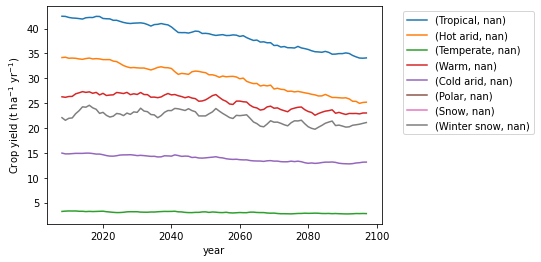

In [11]:
crop.show()

In [12]:
crop.adjust(200)

P0 (t ha-1 yr-1)      T0 (K)  CO20 (ppm)  year0        a1  \
Tropical            42.481539  297.933014     384.882   2008 -0.064727   
Hot arid            34.178581  298.376777     384.882   2008 -0.074690   
Temperate            3.233413  284.540750     384.882   2008 -0.101976   
Warm                26.282084  289.832986     384.882   2008 -0.106322   
Cold arid           14.963717  284.291730     384.882   2008 -0.042850   
Polar                     NaN  264.225973     384.882   2008       NaN   
Snow                      NaN  269.191513     384.882   2008       NaN   
Winter snow         22.083964  278.881129     384.882   2008 -0.005113   

             stderr-a1        a2  stderr-a2        b1  stderr-b1          b2  \
Tropical           NaN  0.001578        NaN  0.000000        NaN  200.000000   
Hot arid           NaN -0.000345        NaN  0.000000        NaN  200.000000   
Temperate     0.027430  0.007445   0.005914  0.125546   0.047896   50.000002   
Warm          0.020194  0.005912   0.003996  0.171483   0.041032   50.000000   
Cold arid          NaN  0.001344        NaN  0.000000        NaN  200.000000   
Polar              NaN       NaN        NaN       NaN        NaN         NaN   
Snow               NaN       NaN        NaN       NaN        NaN         NaN   
Winter snow        NaN -0.009246        NaN  0.135541        NaN   50.000297   

             stderr-b2  
Tropical           NaN  
Hot arid           NaN  
Temperate    39.084606  
Warm         10.386070  
Cold arid          NaN  
Polar              NaN  
Snow               NaN  
Winter snow        NaN